# <center><font size="+4">Anomaly detection

Groupe: Mariana ALVES, Lucas LIMA LOPES, Shiwen SUN, Candy YU-DOUBLET



# <font size="+3" color="#ADD8E6">Informations destinées à l'expert</font>



## <font color="#ADD8E6">Contexte




Un expert en systèmes aéronautiques a demandé l'analyse d'un ensemble de données, qui contient 11 variables d'information sur plusieurs vols, pour toutes les seconde des vols. Les données sont étiquetées par jour, par vol et par fênetre, (les fenêtres sont des séquences de mesures, de longueur allan jusqu'à 100 secondes).

Il souhaite disposer d'un algorithme permettant de détecter les fênetres "anormales".

Nous avons ici un jeu de données contaminé : des données dans le jeu de données sont des anomalies et nous n'avons pas apriori de labels sur les données. Il s'agit donc d'un problème d'**outlier detection** où nous cherchons à détecter quelles données sont rares et différentes des autres.

## <font color="#ADD8E6">Analyse Préliminaire des Données

La première étape, afin de mieux comprendre le jeu de données fourni par l'expert, est d'ajouter des paramètres de vol et de temps. 

Un vol typique comportera différentes phases, telles que le décollage, la croisière et l'atterrissage, où les 11 variables auront des valeurs très différentes. Par conséquent, une hypothèse raisonnable consiste à considérer que les points de données sont comparables entre les vols si elles appartiennent à la même phase du vol. En effet, on considère que pour deux vols distincts, les phases d'atterrissages du vol 1 et du vol 2 vont avoir des mesures similaires.

Une fois ajoutée au jeu des données, l'évolution dans le temps de chaque variable **p** a été tracée pour chaque vol. Les résultats de l'analyse précédente ont montré une variabilité importante entre les données de chaque vol. De plus, ils ont également montré qu'il est possible d'identifier des phases de vol distinctes dans les variables, ce qui a conduit aux premièrse décisions de l'analyse :

1. Dans les approches proposées, nous ne cherchons pas à comparer des données entre vols, mais à détecter des comportements anormaux entre plusieurs fenêtres de vol consécutifs.

2. Le paramètre phase du vol sera utilisé pendant les analyses, car on a considéré que les fenêtres se regrouperaient si elles étaient temporellement proches les unes des autres, et qu'à l'inverse, les mesures anormales seraient isolées de toutes les autres fenêtres.

3. Dans les approches proposées, nous utiliserons l'algorithme de détection d'anomalie "Isolation Forest". Parmi les quatre algorithmes considérés (One Class SVM, Elliptic Envelope, Local Outlier Factor, Isolation Forest), les caractéristiques suivantes du jeu de données ont été fondamentales pour la décision :

    - Étant donné que les différentes phases de vol devraient donner lieu à des mesures différentes, nous ne pouvons pas définir une zone unique et nous attendre à ce que toutes les bonnes mesures y tombent, donc créer un contour elliptique ne fonctionnera pas.
    - Les quatre algorithmes considérés sont basés sur la distance relative des points, ce qui signifie qu'ils souffrent tous de la malédiction de la dimension. Lorsque l'on traite de grandes dimensions (un grand nombre de variables), les scores obtenus par les algorithmes perdent de leur signification. Toutefois, entre les quatre choix, étant donné que la "Random Forest" implique des coupes aléatoires, si le nombre d'arbres est suffisant, elle sera plus robuste que les autres options lorsqu'il s'agit de grandes dimensions.


## <font color="#ADD8E6">Proposition 

Afin de détecter les fenêtres anormales, nous proposons deux approches, où nous analysons les vols séparément pour détecter les fenêtres qui paraissent incohérentes par rapport aux fenêtre voisines du même vol, en utilisant l'algorithme "Random Forest".







### <font color="#ADD8E6">Première approche </font>
Notre proposons la procédure de détection d'anomalies suivante: 

1. En considérant tous les points de chaque vol et en définissant un **taux de contamination par vol (15%)**, on peut obtenir un étiquetage initial pour séparer les points "anormaux" avec un algorithme de détection d'anomalies : le **"Random Forest"**.

2. Nous pouvons compter le nombre de points anormaux dans chaque fenêtre et déterminer un **seuil (en percentage de points anormaux) à partir duquel on considère qu'une fenêtre est anormale (50%)**. 



### <font color="#ADD8E6">Deuxième approche </font>
Notre proposons la procédure de détection d'anomalies suivante:

1. Feature Engineering: On synthétise et on représente les 100 secondes de chaque variable de chaque fenêtre par des statistiques sur le fenêtre en question. On utilise pour chaque variable leur moyenne, écart-type, médiane, minimum, maximum, le 1er et 3e quartile et l'écart interquartile. Cela nous donne 8 variables pour chaque variable initiale + la variable de temps qu'on représente par la moyenne de chaque fenêtre. On a alors 8*11+1 = 89 variables.
On a donc 89 variables pour 1637 points (1637 fenêtres). Le problème étant à grande dimension. En grandes dimensions, les distances entre les points deviennent relativement proches et il est alors difficile de détecter les anomalies car il y aura moins de points anormaux plus distants des autres.

2. Pour pouvoir détecter des données anormales, il faut diminuer le bruit des données et capturer les composants perninents de notre jeu de données. Nous avons donc ensuite besoin de réduire la dimension du problème. Pour ce faire, nous gardons **6 dimensions principales** qui sont les projections linéaires des autres dimensions permettant de conserver le maximum d'information (de variance). Nous avons choisi 6 dimension car sur le vol 3, c'est le nombre de fenêtres.

3. Ensuite, nous pouvons faire une détection d'anomalie sur ces données avec **l'"Isolation Forest" avec un taux de contamination défini (15%)**.    

## <font color="#ADD8E6">Comparaison des propositions</font>

Pour aider l'expert à choisir parmi les deux approches, nous avons comparé leurs avantages et inconvénients et les résultats qu'ils fournissent.




### <font color="#ADD8E6">Avantages et inconvénients

La première approche est intéressante car elle permet de travailler sur l'information initiale : les 11 variables telles qu'elles étaient. 
La principale difficulté est de proprement définit une anomalie : à partir de combien de points anormaux on considère qu'une fenêtre est anormale. Cette décision est arbitraire et dépend de la façon dont l'expert perçoit l'anomalie. Cette méthode est donc intéressante pour conserver toute l'information initiale, mais elle est à éviter si une telle définition d'une anomalie est difficile dans le cas présent. 

En plus, parce que la feauture d'une fenêtre n'était pas définie dans la première méthode, un problème possible identifié est l'agrégation des points "anormaux" d'une fênetre donnée. Si les 100 points d'une fênetre avaient tous des valeurs similaires "anormales", l'analyse précédente pourrait ne pas les détecter en tant que valeurs "anormales".  

Le dernier problème de cette méthode est également lié à la non-définition d'une feature. Comme nous travaillons avec des données brutes, il est possible que l'algorithme de détection des anomalies identifie une grande distance d'un point dans une direction non intéressante, c'est-à-dire, dans une direction qui ne correspond pas à la direction d'étalement maximal de l'information. Dans ce cas, l'algorithme pourrait considérer à tort ce point comme anormal, ce qui ne serait pas intéressant pour l'expert.

La deuxième approche permet directement de travailler sur les fenêtres de vol. L'avantage est qu'il n'est plus nécessaire de définir ce seuil de point. Il suffit de choisir un pourcentage de fenêtres que nous souhaitons rejeter en tant qu'anormales. En plus, en raison de la définition étendue des features de la fenêtre, la méthode est plus robuste et produit une feature plus représentative des données. 

### <font color="#ADD8E6">Comparaison des résultats



Afin d'analyser les résultats des approches proposées, ainsi que pour recevoir le feedback de l'expert et, récursivement, affiner les paramètres d'entrée **seuil** et **taux de contamination**, une méthode de réduction de dimension (ACP) a été utilisée afin de réduire les résultats pour chaque vol à 2 dimensions principales et les présenter en 2D.

Pour une analyse cohérente de ces données, toutes les méthodes utilisées doivent être validées par l'expert. Ainsi, les résultats peuvent ne pas être adaptés à la situation réelle.

Néanmoins, un facteur intéressant à noter est que le taux d'anomalie obtenu pour la première approche (10%) était inférieur à celui de la deuxième approche (21%) (pour les paramètres définis ci-dessus). Par contre, lorsque les deux résultats sont visualisés pour chaque vol, la séparation entre les anomalies et les fenêtres normales est beaucoup plus intuitive dans la deuxième méthode.



## <font color="#ADD8E6">Recommandations finales


Après avoir les résultats donnés par chaque approche, on recommande finalement l'utilisation de l'approche d'identification des outliers en utilisant l'aggregation des fenêtres par features. Le premier avantage c'est de ne pas avoir la necessité de prendre des hypothèses par rapport aux points dans une fenêtre, et cela est d'autant plus intéressant du fait que l'intêret est de détecter certaines fenêtres entières comme des outliers. Par ailleurs, en faisant l'analyse point par point, on est soumis à la possibilité de ne pas identifier une fenêtre comme un outlier même si elle l'est dans le cas où tous les points de cette fenêtre ont un biais similaire. Dans ce cas là, même si les valeurs de la fênetre sont anormale par rapport à d'autres fenêtres, ses point ne seront pas isolés, mais bien rapprochés les uns des autres. Comme l'analyse par features réduit chaque fenêtre à un point, nous pensons que le risque de ce genre de problème est réduit.

# <font size="+3" color="#ADD8E6">Code



#### <font color="#ADD8E6">Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA

### <font color="#ADD8E6">1. Chargement des données

In [ ]:
data = pd.read_csv('dataset.csv')
data

,day_cycle_window,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
0,1_1_1,-0.805191,-1.141993,-1.328327,-1.516693,-1.373962,-0.808270,-1.070547,-0.504352,2.807146,0.495528,-1.246737
1,1_1_1,-0.805191,-1.134902,-1.320393,-1.505848,-1.361560,-0.807840,-1.064212,-0.516000,2.894177,0.494467,-1.244472
2,1_1_1,-0.805191,-1.117304,-1.307167,-1.505848,-1.361560,-0.807840,-1.064212,-0.516000,2.981904,0.429370,-1.244472
3,1_1_1,-0.814231,-1.114206,-1.287593,-1.442302,-1.287565,-0.807840,-1.045557,-0.516000,3.063298,0.348056,-1.244472
4,1_1_1,-0.848104,-1.112276,-1.285393,-1.429076,-1.270722,-0.807840,-1.017575,-0.664906,3.049237,0.118828,-1.270237
...,...,...,...,...,...,...,...,...,...,...,...,...
162697,4_4_160,0.147741,0.060913,0.185874,-0.163053,-0.284814,0.150407,0.029841,0.111318,-1.663704,0.614371,0.432218
162698,4_4_160,0.147741,0.060913,0.185874,-0.163053,-0.284814,0.177867,0.029841,0.113368,-1.663704,0.614371,0.432218
162699,4_4_160,0.147741,0.060913,0.185874,-0.163053,-0.284814,0.179901,0.029841,0.113368,-1.663704,0.614371,0.432218
162700,4_4_160,0.147741,0.060913,0.185874,-0.163053,-0.232045,0.179901,0.029841,0.113368,-1.663704,0.614371,0.432218


### <font color="#ADD8E6">2. Ajout des variables temporelles 

In [ ]:
# Create Additional Variables

# Variable 'day'
data = data.assign(
    day=data.day_cycle_window.apply(lambda x: x.split('_')[0])
)

# Variable 'flight'
data = data.assign(
    flight=data.day_cycle_window.apply(lambda x: int(x.rsplit('_', 1)[0]))
)
options = data.flight.unique()
data['flight'] = data['flight'].transform(lambda i: np.where(options == i)[0][0]+1)

# Variable 'window'
options = data.day_cycle_window.unique()
data = data.assign(
    window = data.day_cycle_window.transform(lambda i: np.where(options == i)[0][0]+1)
)

# Variable 'phase_of_flight'
indices = []
seconds_count = data.groupby('flight').count().day_cycle_window
for flight in range(1,seconds_count.shape[0]+1):
    seconds = np.arange(1,seconds_count[flight]+1)
    seconds = (seconds - np.min(seconds))/np.ptp(seconds)
    indices = np.append(indices, seconds)
data = data.assign(
    phase_of_flight=indices
)

data

,day_cycle_window,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,day,flight,window,phase_of_flight
0,1_1_1,-0.805191,-1.141993,-1.328327,-1.516693,-1.373962,-0.808270,-1.070547,-0.504352,2.807146,0.495528,-1.246737,1,1,1,0.000000
1,1_1_1,-0.805191,-1.134902,-1.320393,-1.505848,-1.361560,-0.807840,-1.064212,-0.516000,2.894177,0.494467,-1.244472,1,1,1,0.000148
2,1_1_1,-0.805191,-1.117304,-1.307167,-1.505848,-1.361560,-0.807840,-1.064212,-0.516000,2.981904,0.429370,-1.244472,1,1,1,0.000295
3,1_1_1,-0.814231,-1.114206,-1.287593,-1.442302,-1.287565,-0.807840,-1.045557,-0.516000,3.063298,0.348056,-1.244472,1,1,1,0.000443
4,1_1_1,-0.848104,-1.112276,-1.285393,-1.429076,-1.270722,-0.807840,-1.017575,-0.664906,3.049237,0.118828,-1.270237,1,1,1,0.000590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162697,4_4_160,0.147741,0.060913,0.185874,-0.163053,-0.284814,0.150407,0.029841,0.111318,-1.663704,0.614371,0.432218,4,15,1637,0.999750
162698,4_4_160,0.147741,0.060913,0.185874,-0.163053,-0.284814,0.177867,0.029841,0.113368,-1.663704,0.614371,0.432218,4,15,1637,0.999812
162699,4_4_160,0.147741,0.060913,0.185874,-0.163053,-0.284814,0.179901,0.029841,0.113368,-1.663704,0.614371,0.432218,4,15,1637,0.999875
162700,4_4_160,0.147741,0.060913,0.185874,-0.163053,-0.232045,0.179901,0.029841,0.113368,-1.663704,0.614371,0.432218,4,15,1637,0.999937


### <font color="#ADD8E6">3. Analyse Préliminaire des Données

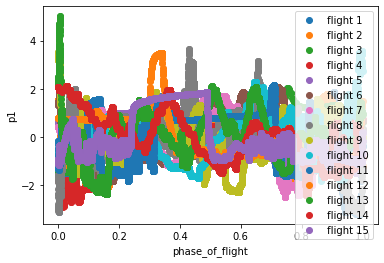

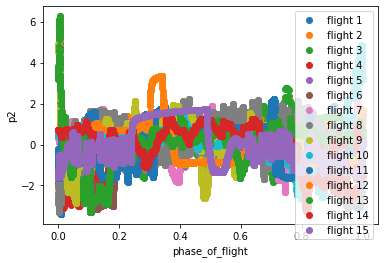

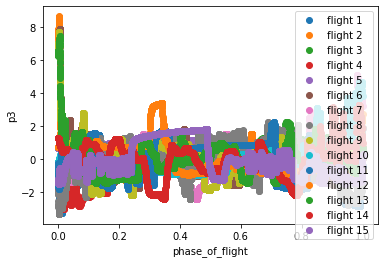

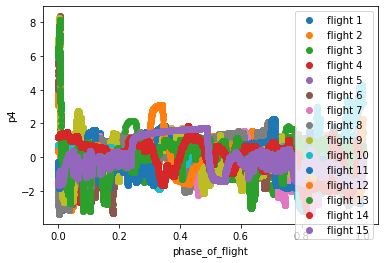

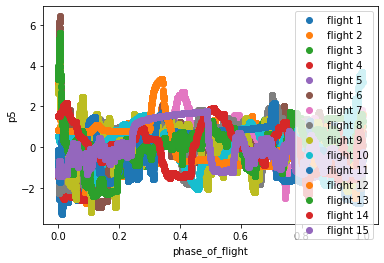

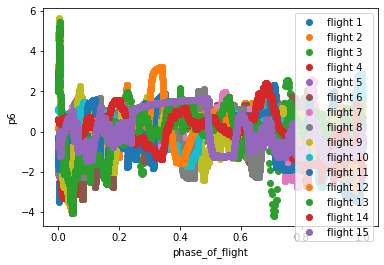

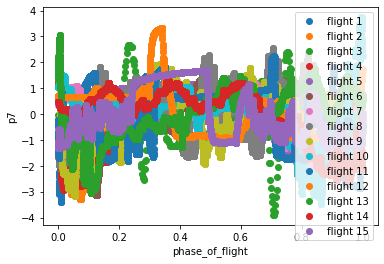

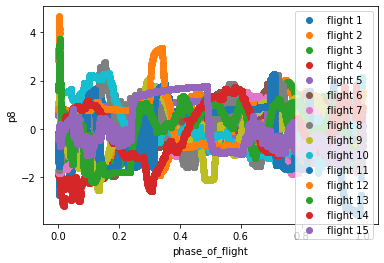

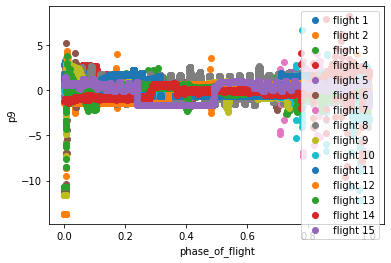

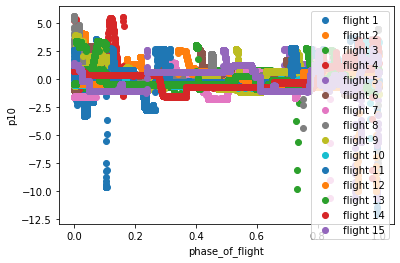

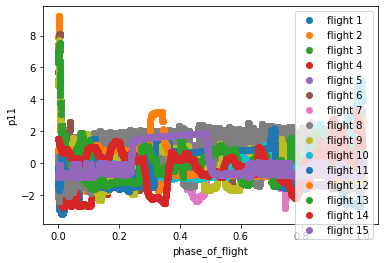

In [ ]:
variables = ['p1','p2','p3','p4','p5','p6','p7','p8','p9','p10','p11']
for variable in variables:
    flight_data = data.groupby('flight')
    plt.figure()
    for flight in range(1,flight_data.ngroups+1):  
        plt.plot(flight_data.get_group(flight)['phase_of_flight'],flight_data.get_group(flight)[variable],'o',label="flight "+str(flight))
        plt.legend()
        plt.xlabel('phase_of_flight')
        plt.ylabel(variable)

## <font color="#ADD8E6">I. Implémentation de la première approche


### <font color="#ADD8E6">1. Détection d'anomalie sur les points



En définissant un taux de contamination, il serait possible d'obtenir un étiquetage initial pour séparer les datapoints "anormales".

In [ ]:
###Isolation Forest
datanew = data.copy()

flight_data = datanew.groupby(['flight'])
variables = ['p1','p2','p3','p4','p5','p6','p7','p8','p9','p10','p11','phase_of_flight']
label_IsoForest =np.array([])

for i in flight_data.groups.keys():
    flight_data_i = flight_data.get_group(i)
    X = flight_data_i[variables]
    clf = IsolationForest(n_estimators=100, contamination=0.15) # nu corresponds to contamination
    # Perform Isolation Forest on datapoints of every flight
    clf.fit(X.values)
    ypredd = clf.predict(X.values)
    label_IsoForest= np.append(label_IsoForest,ypredd)
    print("done for flight "+str(i))

data = data.assign(
    points_label_IsoForest=label_IsoForest.astype(int)
)
data

done for flight 1
done for flight 2
done for flight 3
done for flight 4
done for flight 5
done for flight 6
done for flight 7
done for flight 8
done for flight 9
done for flight 10
done for flight 11
done for flight 12
done for flight 13
done for flight 14
done for flight 15


,day_cycle_window,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,day,flight,window,phase_of_flight,points_label_IsoForest
0,1_1_1,-0.805191,-1.141993,-1.328327,-1.516693,-1.373962,-0.808270,-1.070547,-0.504352,2.807146,0.495528,-1.246737,1,1,1,0.000000,-1
1,1_1_1,-0.805191,-1.134902,-1.320393,-1.505848,-1.361560,-0.807840,-1.064212,-0.516000,2.894177,0.494467,-1.244472,1,1,1,0.000148,-1
2,1_1_1,-0.805191,-1.117304,-1.307167,-1.505848,-1.361560,-0.807840,-1.064212,-0.516000,2.981904,0.429370,-1.244472,1,1,1,0.000295,-1
3,1_1_1,-0.814231,-1.114206,-1.287593,-1.442302,-1.287565,-0.807840,-1.045557,-0.516000,3.063298,0.348056,-1.244472,1,1,1,0.000443,-1
4,1_1_1,-0.848104,-1.112276,-1.285393,-1.429076,-1.270722,-0.807840,-1.017575,-0.664906,3.049237,0.118828,-1.270237,1,1,1,0.000590,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162697,4_4_160,0.147741,0.060913,0.185874,-0.163053,-0.284814,0.150407,0.029841,0.111318,-1.663704,0.614371,0.432218,4,15,1637,0.999750,-1
162698,4_4_160,0.147741,0.060913,0.185874,-0.163053,-0.284814,0.177867,0.029841,0.113368,-1.663704,0.614371,0.432218,4,15,1637,0.999812,-1
162699,4_4_160,0.147741,0.060913,0.185874,-0.163053,-0.284814,0.179901,0.029841,0.113368,-1.663704,0.614371,0.432218,4,15,1637,0.999875,-1
162700,4_4_160,0.147741,0.060913,0.185874,-0.163053,-0.232045,0.179901,0.029841,0.113368,-1.663704,0.614371,0.432218,4,15,1637,0.999937,-1


### <font color="#ADD8E6">2. Détection d'anomalie sur les fenêtres



En définissant un seuil pour le nombre de datapoints "anormaux" par window, il est possible d'utiliser les labels calculées précédemment pour identifier les windows "anormales".

Ainsi, il a été défini que, pour qu'une window soit considérée comme "anormale", 50% de ses datapoints doivent être "anormaux".

In [ ]:
###Isolation Forest
datanew = data.copy()

#limit percentage of anomalies allowed per window 
limit_percentage = 0.5
window_data = datanew.groupby(['window'])
label_IsoForest_from_points = np.full((1, window_data.ngroups), 1)[0]

for i in window_data.groups.keys():
  window = window_data.get_group(i)
  anomalies_count = (window['points_label_IsoForest'] == -1).sum()
  if (anomalies_count/len(window) > limit_percentage):
    label_IsoForest_from_points[i-1] = -1
  
percentage_of_anomalies = int((label_IsoForest_from_points == -1).sum()/label_IsoForest_from_points.size*100)
print(f"Percentage of anomalies in all points = {percentage_of_anomalies}%")

Percentage of anomalies in all points = 14%


### <font color="#ADD8E6">3. Analyse des résultats

Afin d'analyser visuellement l'étiquetage effectué dans la section précédente, une ACP a été réalisée sur les données de chaque vol et les deux directions principales ont été tracées pour chaque vol. Les points rouges correspondent aux windows "anormales". Chaque fenêtre était représentée par la moyenne de ses points.

In [ ]:
def plot2DPCA(X_new,flight,label):

    plt.figure()
    plt.title("Flight "+str(flight))
    colors = ['g' if i == 1 else 'r' for i in label]
    sc = plt.scatter(X_new[:,0],X_new[:,1], c = colors)
    plt.xlabel('pc1')
    plt.ylabel('pc2')
    plt.xlim([X_new[:,0].min()-3,X_new[:,0].max()+3])
    plt.ylim([X_new[:,1].min()-3,X_new[:,1].max()+3])

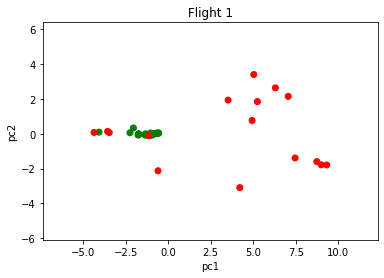

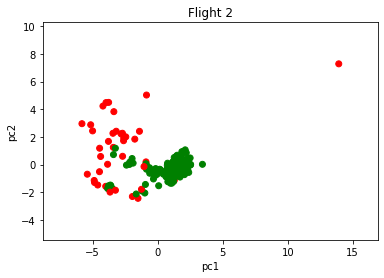

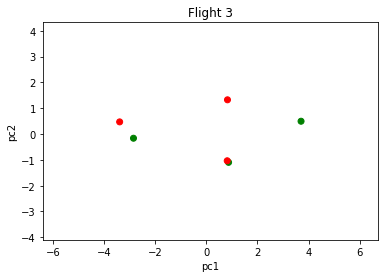

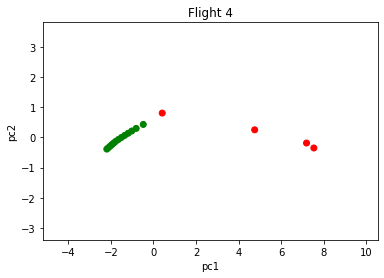

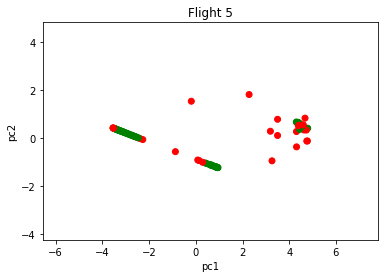

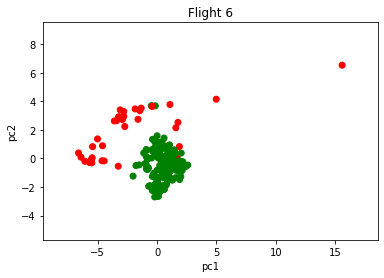

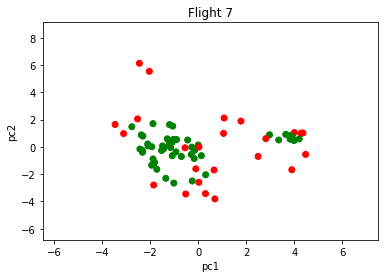

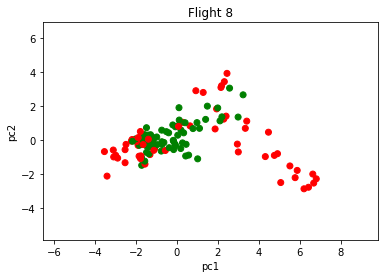

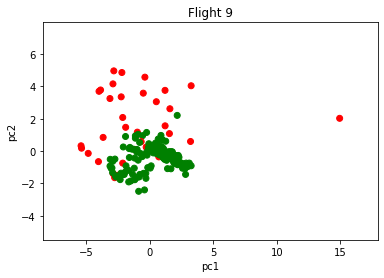

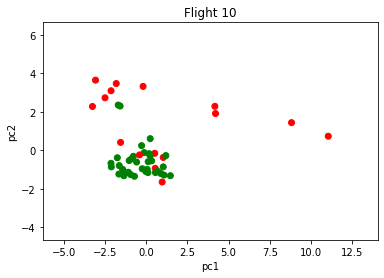

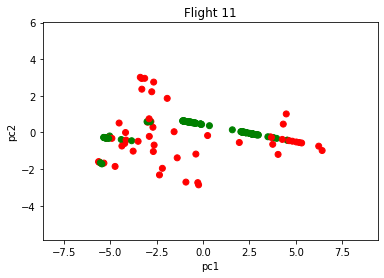

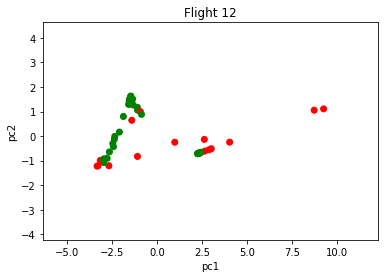

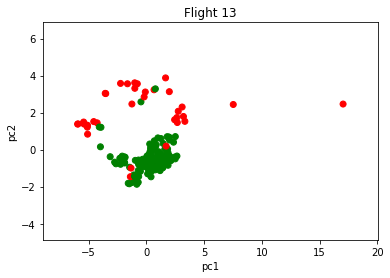

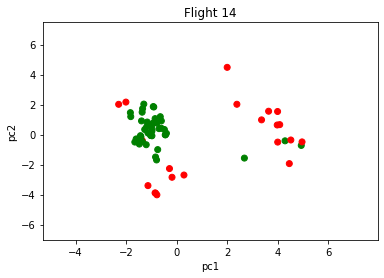

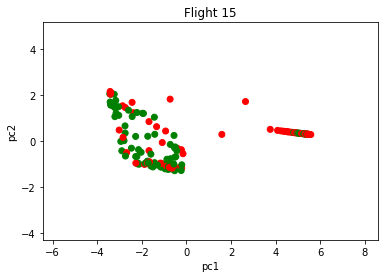

In [ ]:
###Isolation Forest
datanew = data.copy()

flight_data = datanew.groupby(['flight'])
variables = ['p1','p2','p3','p4','p5','p6','p7','p8','p9','p10','p11','phase_of_flight']
total_window_data = pd.DataFrame()

for i in flight_data.groups.keys():
    window_data = flight_data.get_group(i).groupby('window').mean()
    total_window_data = total_window_data.append(window_data)
    n = 2 
    X = window_data[variables]
    data_pca = PCA(n_components = n)
    data_pca.fit(np.array(X))
    X_new = data_pca.fit_transform(X)
    label_IsoForest_flight = window_data['points_label_IsoForest']
    plot2DPCA(X_new,i,label_IsoForest_flight)

In [ ]:
percentage_of_anomalies = int(len(total_window_data[total_window_data['points_label_IsoForest'] == -1])/total_window_data['points_label_IsoForest'].sum()*100)
print(f"Percentage of anomalies with first approach = {percentage_of_anomalies}%")

Percentage of anomalies with first approach = 10%


## <font color="#ADD8E6">II. Implémentation de la deuxième approche



### <font color="#ADD8E6">1. Création de features représentant les fenêtres



Afin de pouvoir classer les fênetres fournies en "normales" ou "anormales", il faut définir plusieurs "features" pour une fênetre. La "feature" de la fênetre est une opération d'agrégation qui combine les points de chaque window et produit un point unique représentatif de la window en question, sur la base des informations de chaque point.

In [ ]:
features = pd.DataFrame()
variables = ['p1','p2','p3','p4','p5','p6','p7','p8','p9','p10','p11','phase_of_flight']

data_windows = data.groupby(['flight','window'])[variables]
f1 = data_windows.mean().set_axis(['mean_' + var for var in variables], axis = 1, inplace = False)
f2 = data_windows.std().set_axis(['std_' + var for var in variables], axis = 1, inplace = False)
f3 = data_windows.median().set_axis(['median_' + var for var in variables], axis = 1, inplace = False)
f4 = data_windows.min().set_axis(['min_' + var for var in variables], axis = 1, inplace = False)
f5 = data_windows.max().set_axis(['max_' + var for var in variables], axis = 1, inplace = False)
f6 = data_windows.quantile(q=0.25).set_axis(['q25_' + var for var in variables], axis = 1, inplace = False)
f7 = data_windows.quantile(q=0.75).set_axis(['q75_' + var for var in variables], axis = 1, inplace = False)

features = pd.concat([f1,f2,f3,f4,f5,f6,f7], axis = 1)
features


mean_p1   mean_p2  ...   q75_p11  q75_phase_of_flight
flight window                      ...                               
1      1      -1.926141 -2.456284  ... -1.674682             0.010961
       2      -1.714067 -2.217161  ... -2.451417             0.025723
       3      -1.534357 -1.779994  ... -1.444150             0.040486
       4      -1.415197 -1.453962  ... -2.027655             0.055248
       5      -0.732715 -0.634379  ... -1.164600             0.070010
...                 ...       ...  ...       ...                  ...
15     1633   -0.956537 -1.347865  ... -0.702204             0.974914
       1634   -0.984032 -1.350121  ... -0.682591             0.981174
       1635   -1.006301 -1.363260  ... -0.694561             0.987433
       1636   -1.013992 -1.368401  ... -0.692377             0.993693
       1637   -0.485387 -0.623397  ...  0.312115             0.998826

[1637 rows x 84 columns]

### <font color="#ADD8E6">2. Réduction de dimension par PCA + Détection d'anomalie sur les fenêtres



Maintenant que nous avons récupéré des représentations des fenêtres, il peut être difficile de traiter le problème car nous sommes maintenant dans un problème à grandes dimensions, avec 1637 points et 89 dimensions.

En plus, si l'on tient compte du fait que chaque vol sera analysé individuellement, le nombre de fenêtres à analyser pour le vol 3 se réduit à 6. Pour cette raison, il a été décidé de faire une PCA à 6 dimensions et de garder toutes les dimensions obtenues.

In [ ]:
###Isolation Forest
n = 6
labels_from_features = np.array([])
features_PCA_2 = np.array([[]])

# for each flight
for i in features.groupby('flight').groups.keys():
  flight_features = features.groupby('flight').get_group(i)
  # apply a PCA on all defined features
  data_pca = PCA(n_components = n)
  data_pca.fit(flight_features)
  flight_features_PCA = data_pca.fit_transform(flight_features)
  features_PCA_2 = np.append(features_PCA_2,flight_features_PCA,0) if (features_PCA_2.size != 0) else flight_features_PCA

  # apply an anomaly detection algorithm on the PCA data
  clf = IsolationForest(n_estimators=100, contamination=0.15) # nu corresponds to contamination
  clf.fit(flight_features_PCA)
  labels_from_features = np.append(labels_from_features,clf.predict(flight_features_PCA))
  flight_features_PCA

### <font color="#ADD8E6">3. Analyse des résultats

Afin d'analyser visuellement l'étiquetage effectué dans la section précédente, une ACP a été réalisée sur les résultats de chaque vol et les deux directions principales ont été tracées pour chaque vol. Les points rouges correspondent aux fenêtres "anormales". 

In [ ]:
features = features.assign(
    pc1=features_PCA_2[:,0]
)
features = features.assign(
    pc2=features_PCA_2[:,1]
)
features = features.assign(
    labels_from_features=labels_from_features
)

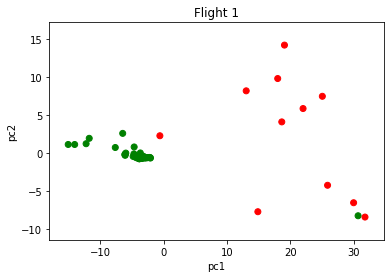

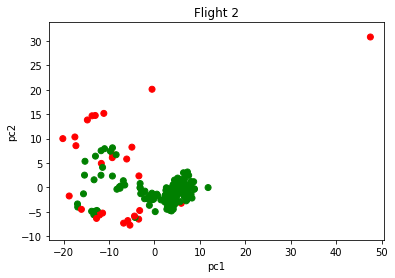

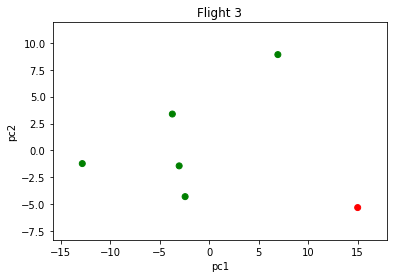

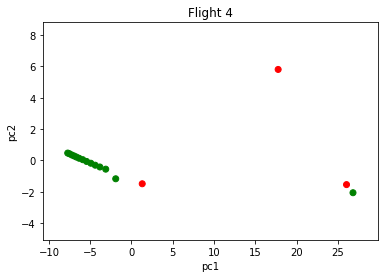

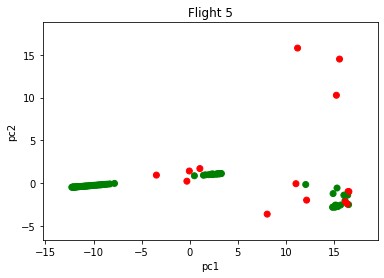

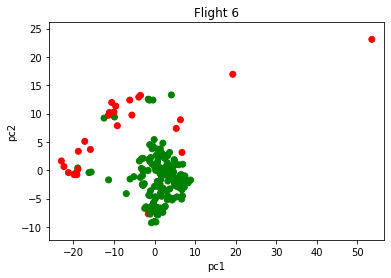

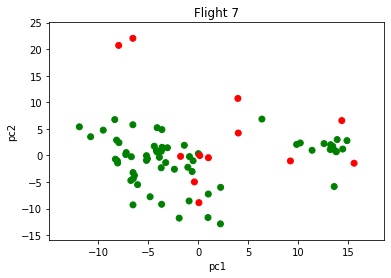

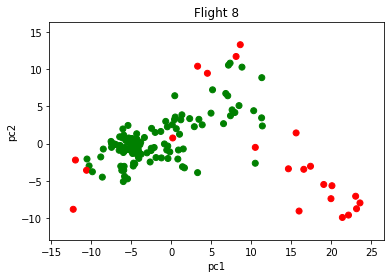

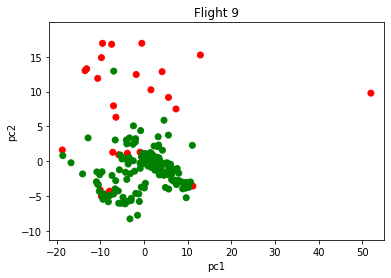

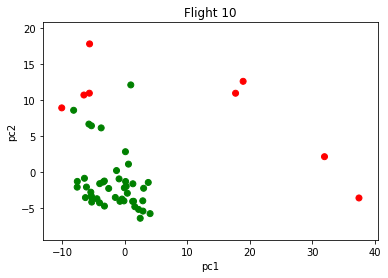

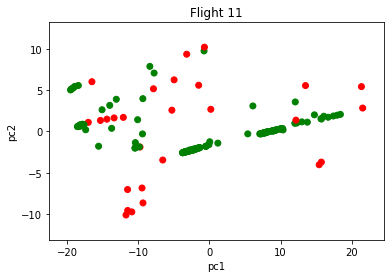

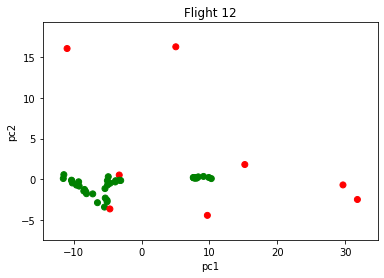

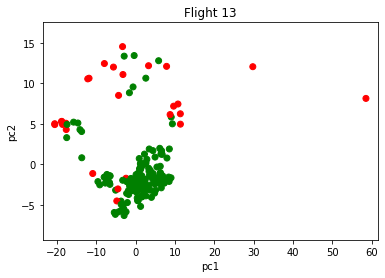

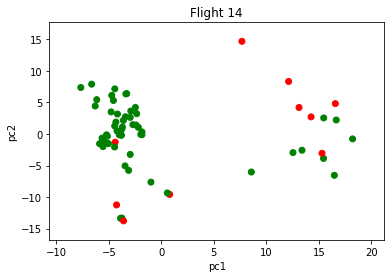

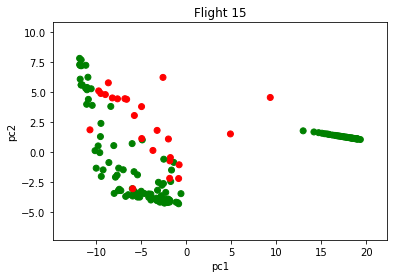

In [ ]:
for i in features.groupby('flight').groups.keys():
    flight_data = features.groupby('flight').get_group(i)
    plot2DPCA(np.array(flight_data[['pc1','pc2']]),i,flight_data['labels_from_features'])

In [ ]:
percentage_of_anomalies = int(len(features[features['labels_from_features'] == -1])/features['labels_from_features'].sum()*100)
print(f"Percentage of anomalies with second approach = {percentage_of_anomalies}%")

Percentage of anomalies with second approach = 21%
